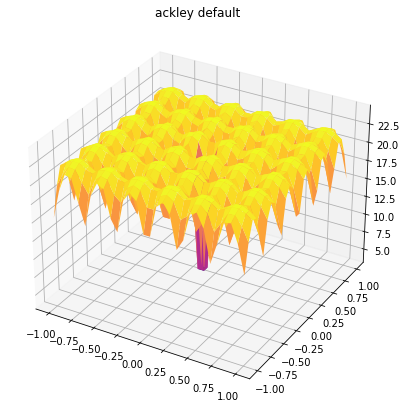

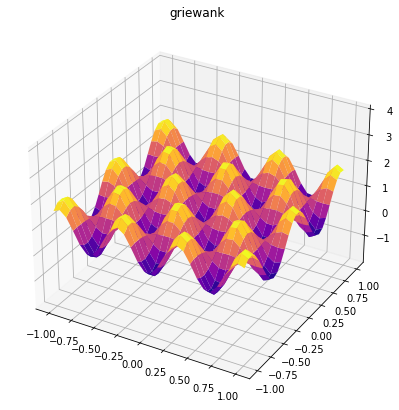

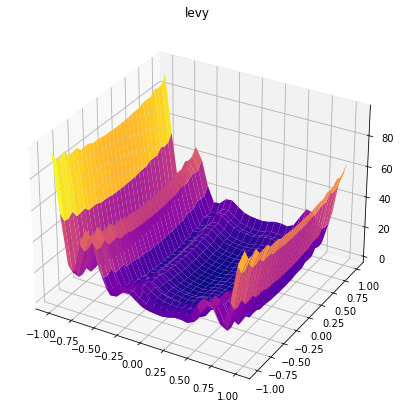

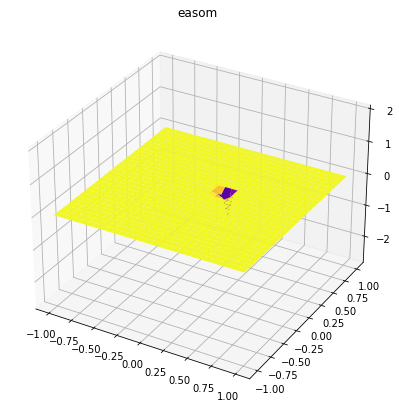

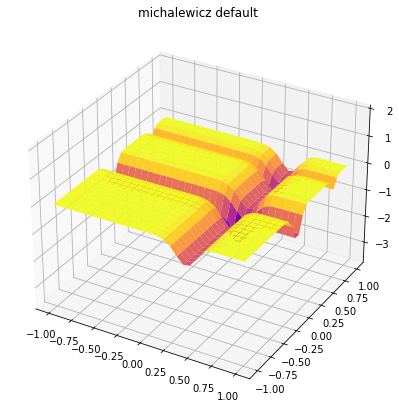

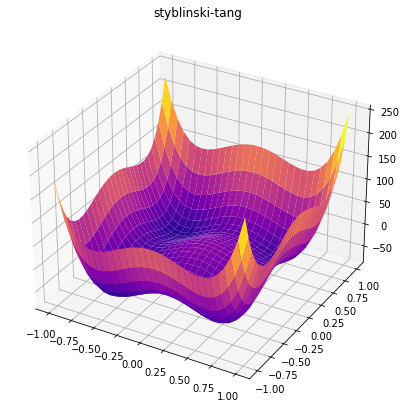

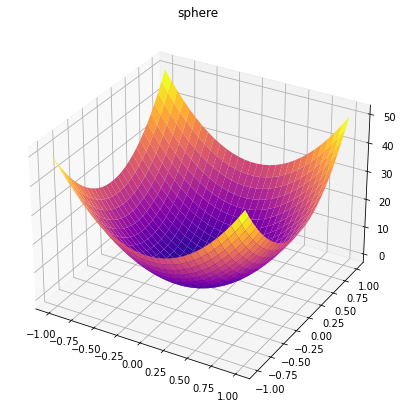

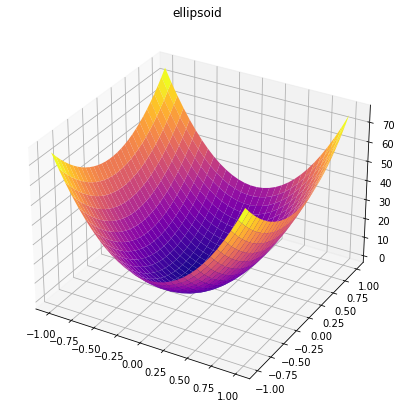

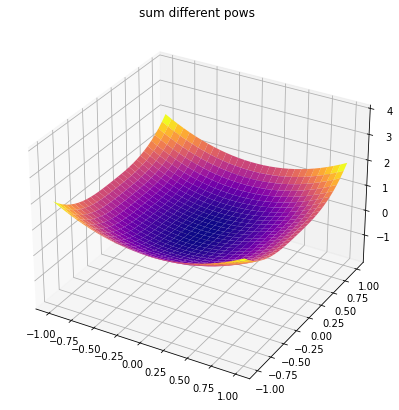

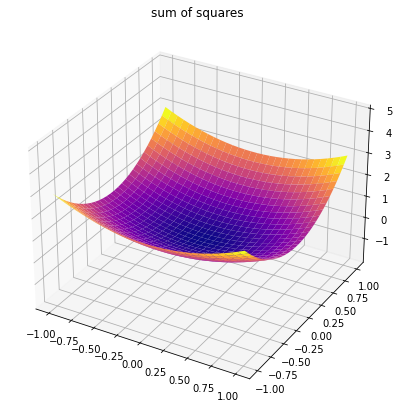

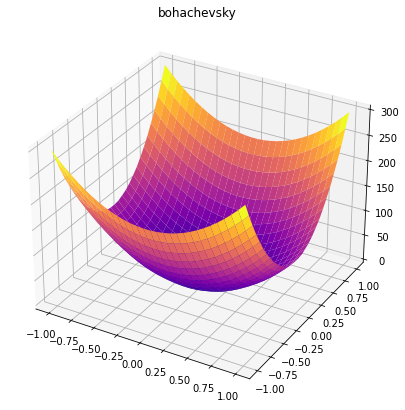

                   styblinski-tang           sphere        ellipsoid      bohachevsky
  styblinski-tang              0.0             0.12             0.14             0.14
                               1.0          0.72547          0.68824          0.68665

           sphere              0.1              0.0             0.06             0.06
                           0.72547              1.0          0.94868          0.94873

        ellipsoid             0.11             0.06              0.0             0.12
                           0.68824          0.94868              1.0          0.80011

      bohachevsky             0.11             0.06             0.12              0.0
                           0.68665          0.94873          0.80011              1.0



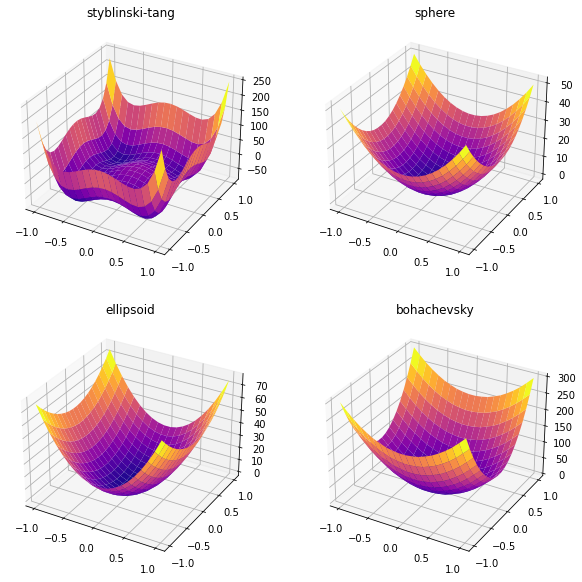

Avg relative distance:  0.1
Avg distance:  9.37
Correlation coefficient:  0.83289
Comentario:
Si no multiplico X^6 por 80, las distancias son las mismas, sólo multiplico para que se vea que el crecimiento es similar
Avg relative distance:  0.12
Avg distance:  925185.08
Correlation coefficient:  -0.20515


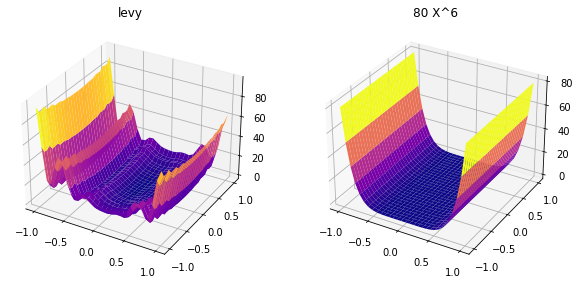

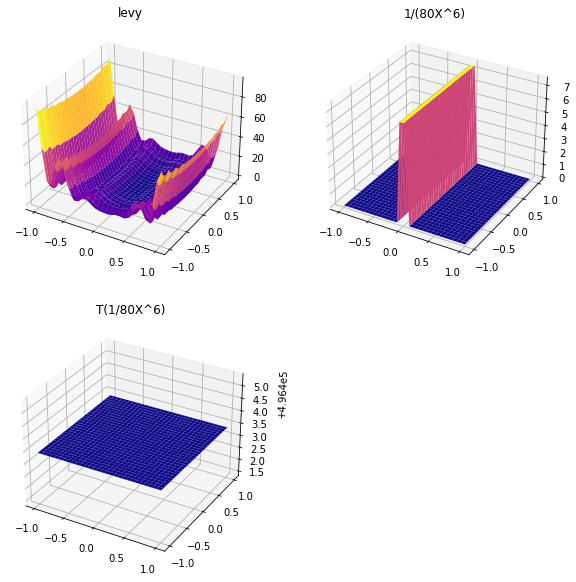

Avg relative distance:  0.22
Avg distance:  0.44
Correlation coefficient:  0.05356


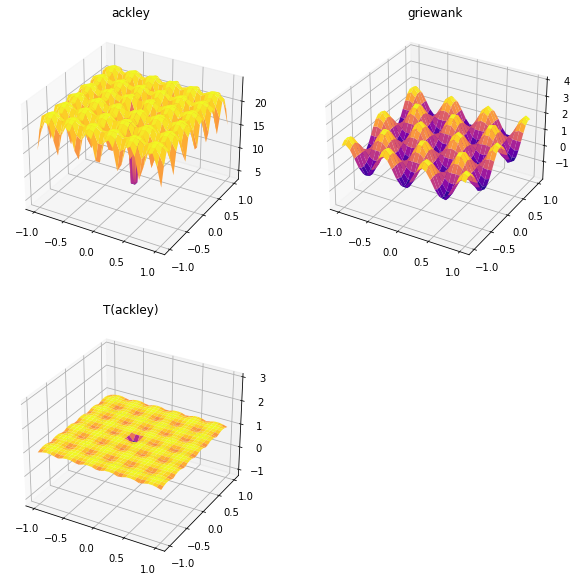

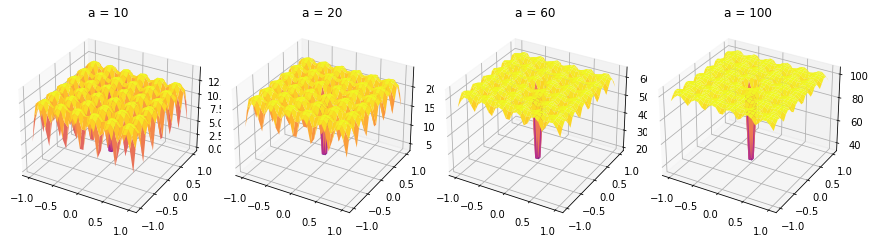

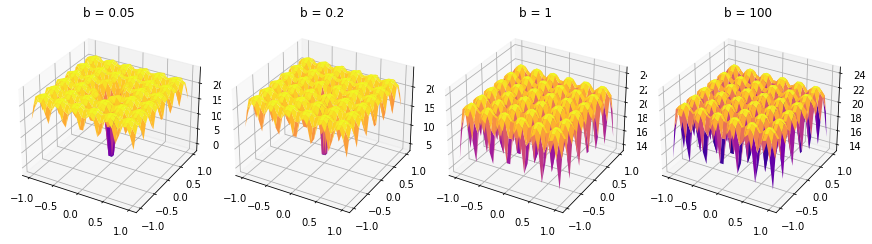

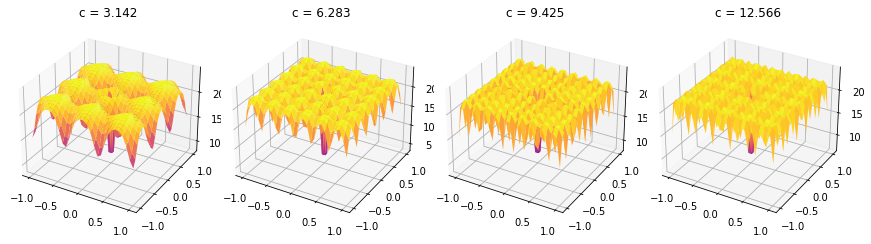

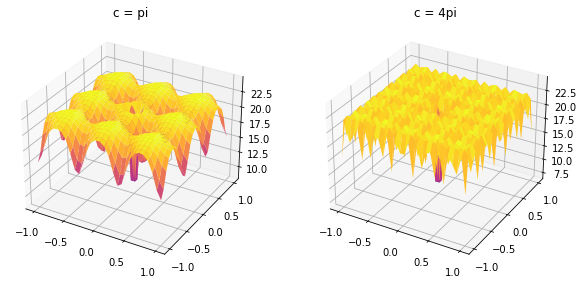

Avg relative distance:  0.1
Avg distance:  1.38
Correlation coefficient:  0.22718


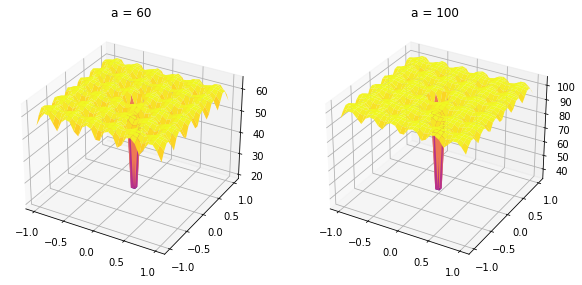

Avg relative distance:  0.01
Avg distance:  0.6
Correlation coefficient:  0.98161


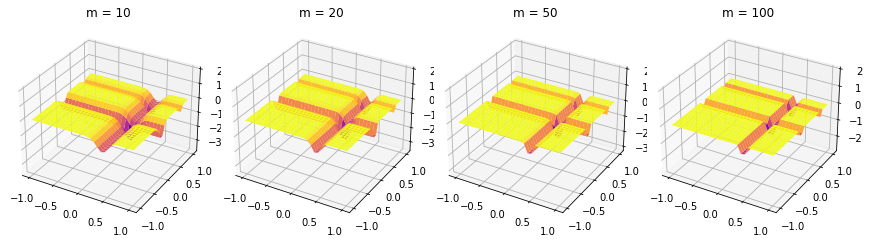

                                10               20               50              100

               10              0.0             0.03             0.05             0.06
                               1.0          0.97089          0.89617          0.83662

               20             0.03              0.0             0.03             0.04
                           0.97089              1.0          0.97118          0.92305

               50             0.06             0.03              0.0             0.02
                           0.89617          0.97118              1.0           0.9821

              100             0.08             0.05             0.02              0.0
                           0.83662          0.92305           0.9821              1.0



In [1]:
import import_ipynb
import dimension2plus as d2

In [19]:
@np.vectorize
def boha_n(*args):
    args = d2.scale_from_unity(args,-10,10)
    s = 0
    i = 1
    for arg in args:
        s += i*arg**2
        if i%2 == 0:
            f = np.cos
        else:
            f = np.sin
        s -= (len(args)+i)*0.1*f((len(args)+i)*np.pi*arg)
        i += 1
    return s
boha_n.__name__= 'bohachevsky'

### Bowl shaped in 3D
(Cannot plot :/)

In [28]:
nsamples = 10
x = np.linspace(-1, 1, nsamples)
y = np.linspace(-1, 1, nsamples)
z = np.linspace(-1, 1, nsamples)
X, Y, Z = np.meshgrid(x, y, z)
XYZ = np.stack((X.flatten(), Y.flatten(), Z.flatten()), axis = -1)

fs = [d2.styb_tang, d2.sphere, d2.ellipsoid, boha_n]
row_format ="{:>17}" * (len(fs) + 1)
print(row_format.format("", *d2.vnamer(fs)))
for f1 in fs:
    distances = []
    ros = []
    Z1 = f1(X, Y, Z)
    Z1 = Z1.flatten()
    for f2 in fs:
        Z2 = f2(X, Y, Z)
        Z2 = Z2.flatten()
        TZ1 = d2.line_transform(Z1,Z2,XYZ)
        distances.append(str(round(d2.avg_rel_difference(TZ1, Z2, 0.05),2)))
        ros.append((np.corrcoef(Z1, Z2)[1][0]).round(5))
    print(row_format.format(f1.__name__, *distances))
    print(row_format.format('', *ros))
    print('')


                   styblinski-tang           sphere        ellipsoid      bohachevsky
  styblinski-tang              0.0              0.1             0.12             0.12
                               1.0          0.79422          0.73531          0.73481

           sphere             0.09              0.0             0.07             0.07
                           0.79422              1.0          0.92582          0.92574

        ellipsoid              0.1             0.07              0.0             0.13
                           0.73531          0.92582              1.0          0.71415

      bohachevsky              0.1             0.07             0.13              0.0
                           0.73481          0.92574          0.71415              1.0



### Ackleys cambiando params
1. Cambiar c. En 2D cambiaba el tamaño de grano
2. Cambiar a. En 2D, apenas cambiaba na

In [35]:
nsamples = 10
x = np.linspace(-1, 1, nsamples)
y = np.linspace(-1, 1, nsamples)
z = np.linspace(-1, 1, nsamples)
X, Y, Z = np.meshgrid(x, y, z)
XYZ = np.stack((X.flatten(), Y.flatten(), Z.flatten()), axis = -1)

a,b,c  = 20,0.2,2*np.pi
Z1 = d2.ackley(a, b, np.pi, X, Y, Z)
Z2 = d2.ackley(a, b, 4*np.pi, X, Y, Z)
shape = Z1.shape

Z1 = Z1.flatten()
Z2 = Z2.flatten()
TZ1 = d2.line_transform(Z1,Z2,XYZ)
print('c = pi vs c = 4pi')
print('Avg relative distance: ', np.round(d2.avg_rel_difference(TZ1, Z2, 0.1),2))
print('Avg distance: ', np.round(d2.avg_difference(TZ1, Z2, 0.1),2))
print('Correlation coefficient: ', np.corrcoef(Z1, Z2)[1][0].round(5))
print('')

Z1 = d2.ackley(60, b, c, X,Y,Z)
Z2 = d2.ackley(100, b, c, X,Y,Z)
shape = Z1.shape

Z1 = Z1.flatten()
Z2 = Z2.flatten()
TZ1 = d2.line_transform(Z1,Z2,XYZ)
print('a = 60 vs a = 100')
print('Avg relative distance: ', np.round(d2.avg_rel_difference(TZ1, Z2, 0.1),5))
print('Avg distance: ', np.round(d2.avg_difference(TZ1, Z2, 0.1),5))
print('Correlation coefficient: ', np.corrcoef(Z1, Z2)[1][0].round(5))



c = pi vs c = 4pi
Avg relative distance:  0.13
Avg distance:  2.51
Correlation coefficient:  0.33669

a = 60 vs a = 100
Avg relative distance:  2e-05
Avg distance:  0.00035
Correlation coefficient:  1.0


### Michalewicz

In [34]:
nsamples = 10
x = np.linspace(-1, 1, nsamples)
y = np.linspace(-1, 1, nsamples)
z = np.linspace(-1, 1, nsamples)
X, Y, Z = np.meshgrid(x, y, z)
XYZ = np.stack((X.flatten(), Y.flatten(), Z.flatten()), axis = -1)

ms = [10,20,50,100]

row_format ="{:>17}" * (len(ms) + 1)
print(row_format.format("", *ms))
print('')
for m1 in ms:
    distances = []
    ros = []
    Z1 = d2.michalewicz(m1,X,Y,Z).flatten()
    for m2 in ms:
        Z2 = d2.michalewicz(m2,X,Y,Z).flatten()
        TZ1 = d2.line_transform(Z1,Z2,XYZ)
        distances.append(str(round(d2.avg_rel_difference(TZ1, Z2, 0.05),2)))
        ros.append((np.corrcoef(Z1, Z2)[1][0]).round(5))
    print(row_format.format(str(m1), *distances))
    print(row_format.format('', *ros))
    print('')


                                10               20               50              100

               10              0.0             0.05             0.12             0.13
                               1.0          0.94212          0.76038          0.71411

               20             0.05              0.0             0.07             0.08
                           0.94212              1.0          0.92768          0.89527

               50              0.1             0.06              0.0             0.02
                           0.76038          0.92768              1.0          0.99584

              100             0.11             0.08             0.02              0.0
                           0.71411          0.89527          0.99584              1.0

